In [16]:
%load_ext autoreload
%autoreload 2

# numerical packages
from copy import copy, deepcopy
import numpy as np
import scipy as sp
from scipy.optimize import minimize

# for visualization (plot and animation)
import matplotlib.pyplot as plt
import matplotlib.animation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

# for drawing Bloch sphere
from qiskit.visualization import plot_bloch_vector
from qiskit.visualization.bloch import Bloch

# my class for the task1
from PSRWST import PSRWSTSolver



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Problem 1
Provide a variational (also called parametric) circuit which is able to generate the most general 1 qubit state. By most general 1 qubit state we mean that there exists a set of the parameters in the circuit such that any point in the Bloch sphere can be reached. Check that the circuit works correctly by showing that by varying randomly the parameters of your circuit you can reproduce correctly the Bloch sphere.

In [66]:
solver = PSRWSTSolver()

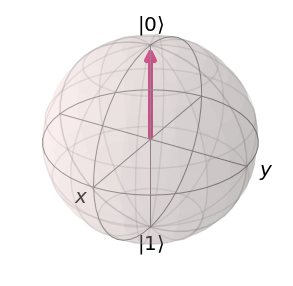

In [86]:
ani_sweep_Bloch_sphere = solver.sweep_on_bloch_sphere()

In [87]:
HTML(ani_sweep_Bloch_sphere.to_html5_video())

#### Problem 2
Use the circuit built in step 1) and, using the SWAP test, find the best choice of your parameters to reproduce a randomly generated quantum state made with 1 qubit.

In [ ]:
number_of_qubits = 1
random_parameters = 2 * np.pi * np.random.random((number_of_qubits, 2))
random_state = solver.N_qubit_embeding_product_state(random_parameters) # randomly generated single qubit state
optimization_traj = [] # empty list for containing the parameter trajectory
res = minimize(N_qubit_loss_val_product_state, np.zeros((number_of_qubits, 2)), method='COBYLA', args = (random_state, optimization_traj)) # , tol=1e-4, options={'maxiter': 3000})
print(res.success)
print("answer: \n" + str(random_parameters[:, 0]%(np.pi)))
print("\n" + str(random_parameters[:, 1]%(2 * np.pi)))
print("optimized solution: \n" + str(res.x[:, 0]%(np.pi)))
print("\n" + str(res.x[:, 1]%(2 * np.pi)))